<a href="https://colab.research.google.com/github/fThauana/projeto_redesNeurais/blob/main/C%C3%B3pia_de_TrabalhoDS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!pip install e import: Primeiro, garantimos que todas as bibliotecas (pacotes de código) necessárias estão instaladas e depois as "importamos" para o nosso projeto.

In [ ]:
!pip install xgboost lightgbm

Importando bibliotecas e conectando o drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import pandas as pd
from IPython.display import display

Pandas e numpy: são a base para a manupulação dos dados. Pandas cria as DataFrames (tabelas) e Numpy é bom p/ cálculos matemáticos.

matplot e seaborn: ferramenta de visualização p/ criar os gráficos.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

scikit-learn: biblioteca princial de machine learning, importando funções específicas:

train_test_split - dividir os dados em treino e teste;
Pipeline e GridSearchCV -  contruir e otimizar o modelo;
TfidfVectorizer - transformar string em num;
LogisticRegression - algorítimo de classificação do modelo;
classification_report, roc_auc_score - métricas p/ avaliar a performace (recall, precision, etc).

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
import joblib

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
caminho_arq = '/content/drive/MyDrive/Data_Science/amazon_cells_labelled.txt'

In [ ]:
#carregar .txt separado por tab
df = pd.read_csv(caminho_arq, sep='\t')
print("Arquivo carregado com sucesso.")
print("Dimensões do dataset", df.shape)
display(df.head())

Arquivo carregado com sucesso.
Dimensões do dataset (1000, 2)


,text,target
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


pd.read_csv: usamos para ler o arquivo .txt, sep='\t' serve para dizer que o text e target são separados por tab

In [ ]:
print("Os nomes das colunas são:")
print(list(df.columns))

print("\nAs 5 primeiras linhas DataFrame:")
display(df.head())

Os nomes das colunas são:
['text', 'target']

As 5 primeiras linhas DataFrame:


,text,target
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
#Informações gerais
print('Informações do DataFrame')
df.info()

Informações do DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1000 non-null   object
 1   target  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


.head(), .info(), .shape: comandos de diagnóstico. Mostram que tempos 1000 insâncias (linhas) e 2 colunas, nenhum dado null, a coluna text é object e o target é int64

In [ ]:
print('Estatísticas Descritivas (Numéricas)')
display(df.describe())

Estatísticas Descritivas (Numéricas)


,target
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


Distribuição da Variável Alvo
target
0    0.5
1    0.5
Name: proportion, dtype: float64


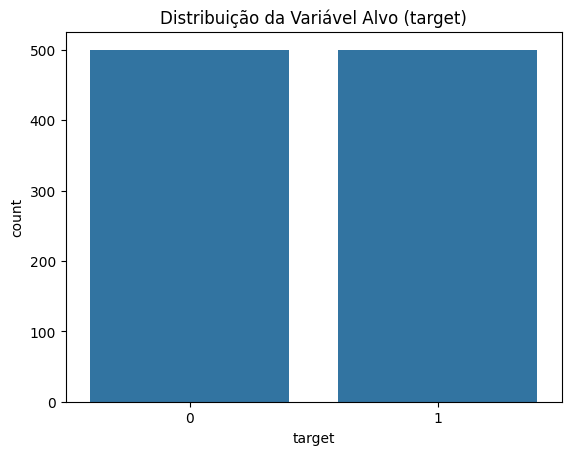

In [ ]:
print('Distribuição da Variável Alvo')
print(df['target'].value_counts(normalize=True)) #conta e mostra como %
sns.countplot(x='target', data=df) #countplot cria grafico
plt.title('Distribuição da Variável Alvo (target)')
plt.show()
#temos uma base de dados balanceada, 50% pertence a classe 0 e 50% a calsse 1

.describe() e sns.countplot: a análise do target mostrou que temos 500 dados da classe 0 e 500 da classe 1. Dados perfeitamente balanceado (simplifica o trein)

In [ ]:
#pré-processamento e definição das variáveis
#var alvo: y (target)
target_column = 'target' #armazema target
#nossa feature x (var q usamos para prever), é o text
feature_column = 'text' #variáveis de entrada

X = df[feature_column]
y = df[target_column]

print('Variáveis X e Alvos Y definidas')
print('Exemplo de X: ', X.iloc[1])
print('Exemplo de y: ', y.iloc[1])

Variáveis X e Alvos Y definidas
Exemplo de X:  Good case, Excellent value.
Exemplo de y:  1


Essa parte do código é a etapa de organização. Pense que você tem uma planilha (o df) com duas colunas: uma com as frases das avaliações (text) e outra com a classificação (target, que é 0 ou 1).

No nosso exemplo: É como se você pegasse a primeira foto da sua pilha (X.iloc[1]), que é "Good case, Excellent value.", e mostrasse a resposta correspondente (y.iloc[1]), que é 1 (positivo). Isso confirma que para aquela "pergunta", você tem a "resposta" certa.

In [ ]:
#divisão dos dados
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) #25% dos dados separados para treino
                                    #divide os dados                                      #como o target tem 50% de positivos e 50% de negativos, stratify=y garante que tanto y_train quanto y_test também tenham essa mesma proporção de 50/50.

print('Dados divididos em treino e teste')
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

Dados divididos em treino e teste
X_train (750,)
X_test (250,)
y_train (750,)
y_test (250,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.feature_extraction.text import TfidfVectorizer

#Vetorização
# Usamos os mesmos max_features=5000
print("Iniciando a vetorização TF-IDF...")
vectorizer = TfidfVectorizer(max_features=5000)

# Ajustar (fit) nos dados de treino e transformar
X_train_vec = vectorizer.fit_transform(X_train) #fit: o tradutor aprende o vocabulario e os pesos apenas olhando os dados de treino
                                                #transdorm: converte as frases de x_train em uma matris numerica esparsa (n guarda 0 p/ economizar)
# APENAS transformar os dados de teste
X_test_vec = vectorizer.transform(X_test) #usa o vocabulario ja aprendido com x_train para traduzir o x_test (evita vazamento de dados)

# Converter para arrays "densos" que a Rede Neural entende
X_train_dense = X_train_vec.toarray() #como os x são matrizes esparsas, convertemos para matrizes densas (arrays NumPy padrão)
X_test_dense = X_test_vec.toarray()   #como entrada para a camada dense

print(f"Formato dos dados de treino: {X_train_dense.shape}")
print(f"Formato dos dados de teste: {X_test_dense.shape}")
print("Vetorização concluída.")

Iniciando a vetorização TF-IDF...
Formato dos dados de treino: (750, 1536)
Formato dos dados de teste: (250, 1536)
Vetorização concluída.


In [ ]:
#Construir Rede Neural
model = Sequential() #comando que cria a base do modelo, Sequencial é uma pilha linear de camadas que vamos add + camadas

model.add(Dense(128, input_shape=(X_train_dense.shape[1],), activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid')) #sigmoid espreme qualquer valor para que fique entre 0 e 1 (a saida vai ser probabilidade de ser positivo)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("Resumo do Modelo")
model.summary() #imprime mostrando a ordem das camadas,o formato de saída de cada uma e número total de "parâmetros" (pesos) que o modelo precisa aprender.

Resumo do Modelo


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       196,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,057 (801.00 KB)

 Trainable params: 205,057 (801.00 KB)

 Non-trainable params: 0 (0.00 B)

1 - Layer type: mostra as camadas em ordem da rede;
2 - Output Shape: mostra como o formato dos dados se transforma a cada camada, a primeira camada recebendo seu valor de entrada (1536 feature) e o e o transforma em um vetor de 128 num. None representa o batch size (lote) que é flexível.
3 - Param# - esses são os parâmetros (pesos e biases) que o modelo aprende durante o treino, aqui esta o conhecimento da rede.
4 - Total params: O número total de "botões" (196.736 + 8.256 + 65) que o otimizador adam precisa ajustar durante o treino para minimizar o erro.
Trainable params: 205.057: Quantos desses parâmetros serão treinados. No caso, todos eles.
on-trainable params: 0: Parâmetros que estão "congelados"

In [ ]:
# 4. Treinar o Modelo
print("\n--- Iniciando o Treinamento da Rede Neural ---")

history = model.fit(X_train_dense, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test_dense, y_test),
                    verbose=2)

print("Treinamento concluído!")


--- Iniciando o Treinamento da Rede Neural ---
Epoch 1/10
24/24 - 2s - 73ms/step - accuracy: 0.5213 - loss: 0.6919 - val_accuracy: 0.6840 - val_loss: 0.6873
Epoch 2/10
24/24 - 0s - 13ms/step - accuracy: 0.6373 - loss: 0.6787 - val_accuracy: 0.7000 - val_loss: 0.6758
Epoch 3/10
24/24 - 0s - 13ms/step - accuracy: 0.7467 - loss: 0.6499 - val_accuracy: 0.7440 - val_loss: 0.6378
Epoch 4/10
24/24 - 0s - 13ms/step - accuracy: 0.8733 - loss: 0.5579 - val_accuracy: 0.7800 - val_loss: 0.5477
Epoch 5/10
24/24 - 0s - 13ms/step - accuracy: 0.8947 - loss: 0.4022 - val_accuracy: 0.7920 - val_loss: 0.4571
Epoch 6/10
24/24 - 0s - 12ms/step - accuracy: 0.9560 - loss: 0.2392 - val_accuracy: 0.8120 - val_loss: 0.4249
Epoch 7/10
24/24 - 0s - 13ms/step - accuracy: 0.9827 - loss: 0.1377 - val_accuracy: 0.8080 - val_loss: 0.4270
Epoch 8/10
24/24 - 0s - 14ms/step - accuracy: 0.9893 - loss: 0.0799 - val_accuracy: 0.8080 - val_loss: 0.4498
Epoch 9/10
24/24 - 0s - 12ms/step - accuracy: 0.9947 - loss: 0.0504 - va


--- Avaliação do Modelo (Rede Neural) ---
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       125
           1       0.82      0.78      0.80       125

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.80      0.80      0.80       250

AUC-ROC Score: 0.8919
AUC-PR Score: 0.8991

Gerando o gráfico de pontos de corte...


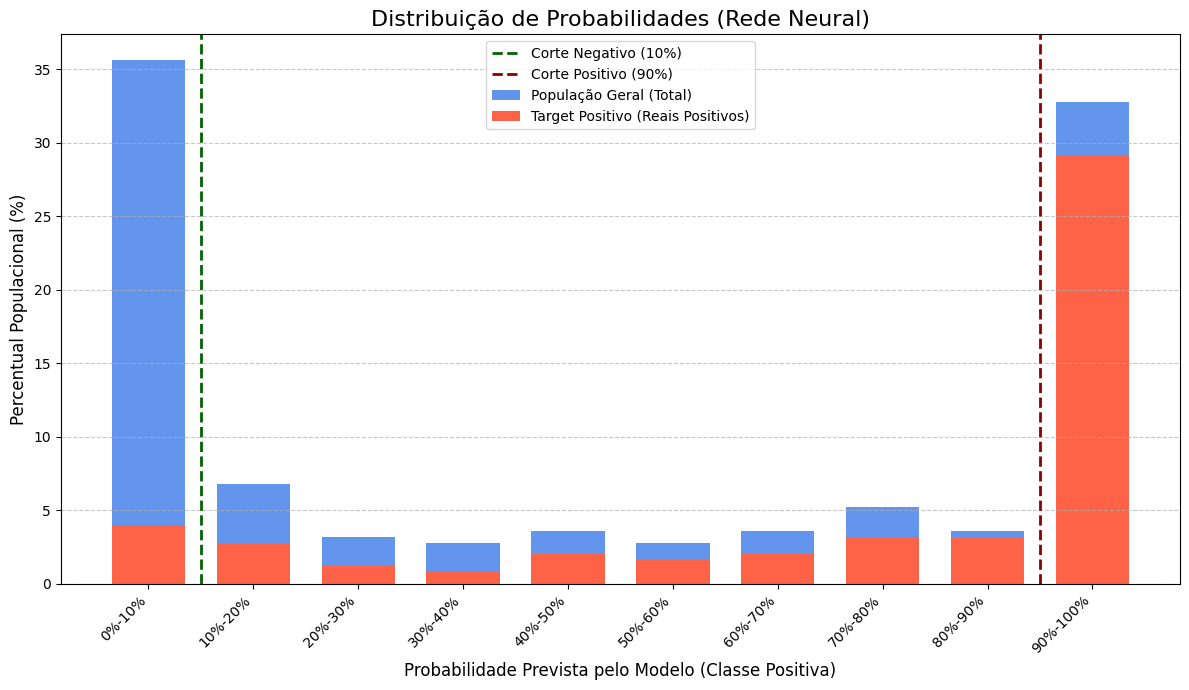

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("\n--- Avaliação do Modelo (Rede Neural) ---")

# 1. Obter Probabilidades
y_proba = model.predict(X_test_dense).ravel()

# 2. Obter Previsões Finais (usando o corte padrão de 0.5)
y_pred = (y_proba > 0.5).astype(int)

# Exibir o relatório de classificação
print("\nRelatório de Classificação")
print(classification_report(y_test, y_pred))

# Exibir a pontuação AUC-ROC
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_proba):.4f}")

# Exibir a pontuação AUC-PR
auc_pr = average_precision_score(y_test, y_proba)
print(f"AUC-PR Score: {auc_pr:.4f}\n")

# --- GRÁFICO (Exatamente a sua função) ---

def plot_cutoff_histogram(y_true, y_proba, step=0.1, corte_negativo=None, corte_positivo=None):
    """
    Plota o gráfico de distribuição de probabilidades com linhas de corte verticais.
    """
    df_plot = pd.DataFrame({'y_true': y_true, 'y_proba': y_proba})
    bins = np.arange(0, 1 + step, step)
    labels = [f'{int(i*100)}%-{int((i+step)*100)}%' for i in bins[:-1]]

    total_pop_dist = pd.cut(df_plot['y_proba'], bins=bins, right=False).value_counts(sort=False, normalize=True) * 100
    positive_pop_dist = pd.cut(df_plot[df_plot['y_true'] == 1]['y_proba'], bins=bins, right=False).value_counts(sort=False)
    positive_pop_dist_norm = (positive_pop_dist / len(df_plot)) * 100

    plt.figure(figsize=(12, 7))
    plt.bar(labels, total_pop_dist, width=0.7, label='População Geral (Total)', color='cornflowerblue')
    plt.bar(labels, positive_pop_dist_norm, width=0.7, label='Target Positivo (Reais Positivos)', color='tomato')

    if corte_negativo is not None:
        pos_neg = (corte_negativo / step) - 0.5
        plt.axvline(x=pos_neg, color='darkgreen', linestyle='--', linewidth=2, label=f'Corte Negativo ({corte_negativo:.0%})')

    if corte_positivo is not None:
        pos_pos = (corte_positivo / step) - 0.5
        plt.axvline(x=pos_pos, color='darkred', linestyle='--', linewidth=2, label=f'Corte Positivo ({corte_positivo:.0%})')

    plt.title('Distribuição de Probabilidades (Rede Neural)', fontsize=16)
    plt.xlabel('Probabilidade Prevista pelo Modelo (Classe Positiva)', fontsize=12)
    plt.ylabel('Percentual Populacional (%)', fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# --- Chamada da Função ---
corte_negativo_escolhido = 0.10
corte_positivo_escolhido = 0.90

print("Gerando o gráfico de pontos de corte...")
plot_cutoff_histogram(y_test, y_proba, step=0.1,
                      corte_negativo=corte_negativo_escolhido,
                      corte_positivo=corte_positivo_escolhido)

In [ ]:
import pandas as pd

df_results = pd.DataFrame({ #Ele cria uma nova tabela para comparar os resultados do seu modelo com as respostas certas.
    'y_true': y_test, #cria uma coluna com os dados de teste (resposta)
    'y_proba': y_proba #cria outra coluna com as proba que o modelo previu
})

# Mesmo valores ponto de corte
corte_negativo = 0.10  #40%
corte_positivo = 0.90  #70%


segmento_neg = df_results[df_results['y_proba'] < corte_negativo] #filtro do df p/ pegar resultados negativos


segmento_manual = df_results[(df_results['y_proba'] >= corte_negativo) & (df_results['y_proba'] < corte_positivo)]


segmento_pos = df_results[df_results['y_proba'] >= corte_positivo]


total_population = len(df_results) #calcula o total do df
total_positives = df_results['y_true'].sum() #soma os casos vp já que são representados por 1

print("--- Análise dos Segmentos para Justificativa ---\n")

# Análise do Segmento Negativo
pop_perc_neg = len(segmento_neg) / total_population * 100 #calcula o tamanho do negativo em relação ao total
pos_perc_neg = segmento_neg['y_true'].sum() / total_positives * 100 #calcula os vp que foram erradamente dados como negativo
print(f"Segmento CLASSE NEGATIVA (Score < {corte_negativo*100:.0f}%):")
print(f"  - Acúmulo Populacional: {pop_perc_neg:.2f}% da população total.")
print(f"  - Positivos Reais no Segmento: {pos_perc_neg:.2f}% de todos os positivos.")
print(f"  - Erro do Modelo (Risco): Baixo risco de 'Falsos Negativos'. Apenas {pos_perc_neg:.2f}% dos clientes bons seriam perdidos.\n")

# Análise do Segmento Manual
pop_perc_manual = len(segmento_manual) / total_population * 100
pos_perc_manual = segmento_manual['y_true'].sum() / total_positives * 100
print(f"Segmento ANÁLISE MANUAL (Score entre {corte_negativo*100:.0f}% e {corte_positivo*100:.0f}%):")
print(f"  - Acúmulo Populacional: {pop_perc_manual:.2f}% da população total.")
print(f"  - Positivos Reais no Segmento: {pos_perc_manual:.2f}% de todos os positivos.")
print(f"  - Erro do Modelo (Risco): Risco moderado de 'Falsos Positivos'. A ação de negócio deve ter custo compatível.\n")


# Análise do Segmento Positivo
pop_perc_pos = len(segmento_pos) / total_population * 100
pos_perc_pos = segmento_pos['y_true'].sum() / total_positives * 100
print(f"Segmento CLASSE POSITIVA (Score > {corte_positivo*100:.0f}%):")
print(f"  - Acúmulo Populacional: {pop_perc_pos:.2f}% da população total.")
print(f"  - Positivos Reais no Segmento: {pos_perc_pos:.2f}% de todos os positivos.")
print(f"  - Erro do Modelo (Risco): Baixo risco de 'Falsos Positivos'. Alta taxa de acerto ao abordar este grupo.\n")

--- Análise dos Segmentos para Justificativa ---

Segmento CLASSE NEGATIVA (Score < 10%):
  - Acúmulo Populacional: 35.60% da população total.
  - Positivos Reais no Segmento: 8.00% de todos os positivos.
  - Erro do Modelo (Risco): Baixo risco de 'Falsos Negativos'. Apenas 8.00% dos clientes bons seriam perdidos.

Segmento ANÁLISE MANUAL (Score entre 10% e 90%):
  - Acúmulo Populacional: 31.60% da população total.
  - Positivos Reais no Segmento: 33.60% de todos os positivos.
  - Erro do Modelo (Risco): Risco moderado de 'Falsos Positivos'. A ação de negócio deve ter custo compatível.

Segmento CLASSE POSITIVA (Score > 90%):
  - Acúmulo Populacional: 32.80% da população total.
  - Positivos Reais no Segmento: 58.40% de todos os positivos.
  - Erro do Modelo (Risco): Baixo risco de 'Falsos Positivos'. Alta taxa de acerto ao abordar este grupo.

